<a href="https://colab.research.google.com/github/SrinithiReshma/ML__PCA/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load   the dataset

In [4]:
data = pd.read_csv("creditcard.csv")

# Separate features and target variable


In [5]:
X = data.drop("Class", axis=1)
y = data["Class"]

# Standardize the features


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA


In [7]:
pca = PCA(n_components=None)  # Determine optimal number of components later
X_pca = pca.fit_transform(X_scaled)

# Scree plot


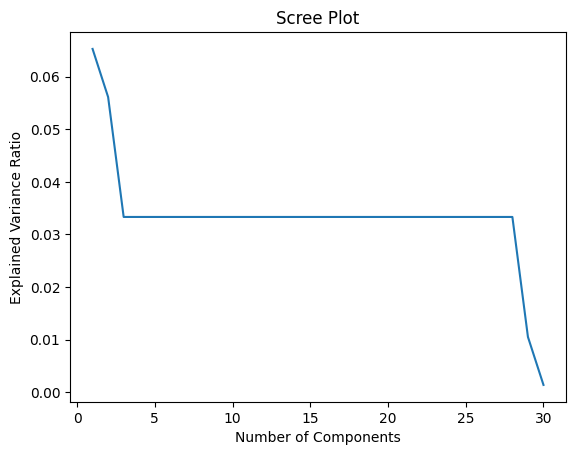

In [8]:
# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [9]:
# Assuming you have the scree plot data
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [10]:
threshold = 0.95


In [11]:
# Find the optimal number of components
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print("Optimal number of components:", n_components)

Optimal number of components: 27


In [12]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [13]:
import seaborn as sns


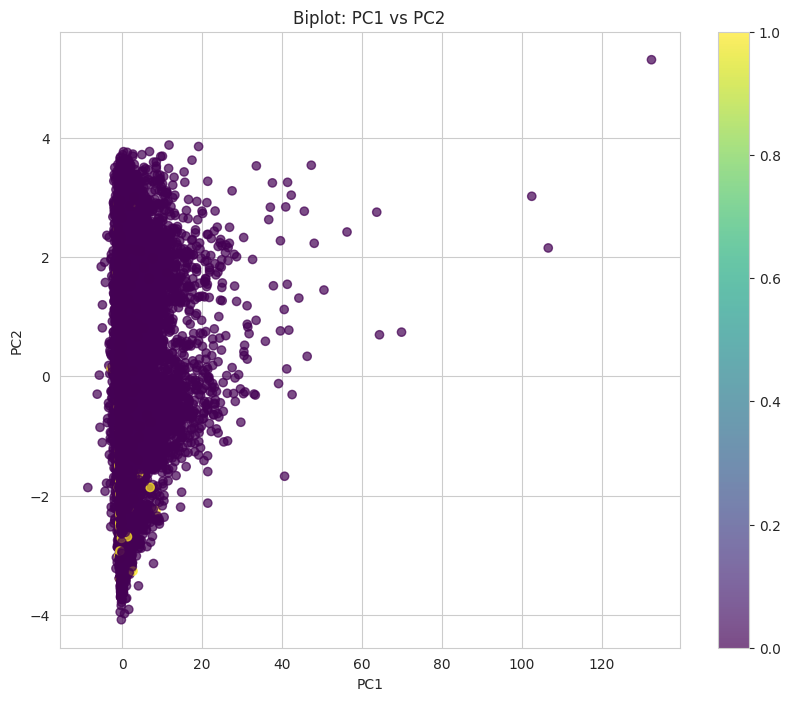

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot: PC1 vs PC2")
plt.colorbar()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [21]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [23]:
f1=f1_score(y_test, y_pred)


In [24]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9991046662687406
Precision: 0.8615384615384616
Recall: 0.5714285714285714
F1-score: 0.6871165644171779


In [29]:
# Assuming you have retrained the model with all 30 features

# New data points for prediction (assuming 28 features)
new_data = np.array([
    [0.75, -0.85, 1.22, 0.33, -0.44, 0.91, -0.13, 0.76, 0.22, -0.58, 0.47, 0.19, -0.34, 0.56, -0.22, 0.44, -0.78, 0.65, -0.12, 0.32, -0.49, 0.22, -0.58, 0.37, 0.24, -0.32, 0.46, 0.28]])

# Since the model is trained with 30 features, add dummy values for the missing features
new_data = np.pad(new_data, ((0, 0), (0, 2)), mode='constant', constant_values=0)  # Pad with zeros

# Apply PCA transformation
new_data_pca = pca.transform(new_data) # Transform the new data using the fitted PCA object

# Make prediction on the new data
new_prediction = model.predict(new_data_pca)  # Use the transformed data for prediction

print("Predicted class for new data:", new_prediction)

Predicted class for new data: [0]
